In [1]:
from lsh import *
from utils import *
from query import *

%load_ext autoreload
%autoreload 2

In [2]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-50000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)
N_data = data.X.shape[1]

PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

# Vary all

In [9]:
N_queries = 10

Ls = [0, 3, 9, 27] #number of neighbors to make candidates
bs = [200] #hash bits
es = [4, 2.7, 2.3, 2.0, 1.8] #error tolerance

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 10
Ls, [0, 3, 9, 27]
bs, [200]
es, [4, 2.7, 2.3, 2.0, 1.8]
Ms, [17, 37, 53, 74, 95]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   4.0,    17,     0,    0.997,    0.750
     0,      0,      1,   200,   4.0,    17,     3,    1.101,    0.875
     0,      0,      2,   200,   4.0,    17,     9,    1.880,    0.908
     0,      0,      3,   200,   4.0,    17,    27,    3.219,    0.947
     0,      1,      0,   200,   2.7,    37,     0,    1.495,    0.818
     0,      1,      1,   200,   2.7,    37,     3,    3.289,    0.916
     0,      1,      2,   200,   2.7,    37,     9,    3.324,    0.942
     0,      1,      3,   200,   2.7,    37,    27,    7.014,    0.967
     0,      2,      0,   200,   2.3,    53,     0,    2.429,    0.818
     0,      2,      1,   200,   2.3,    53,     3,    2.300,    0.918
     0,      2,      2,   200,   2.3,    53,     9,    3.735,    0.957
     0,      2,      3,   200,   2.3, 

Optimal points
  b,   e,  M,  L,    t,  ndgc
200, 4.0, 17,  0, 1.00, 0.750
200, 4.0, 17,  9, 1.88, 0.908
200, 4.0, 17, 27, 3.22, 0.947
200, 2.7, 37, 27, 7.01, 0.967
200, 2.3, 53, 27, 9.68, 0.983
200, 2.0, 74,  9, 5.97, 0.954
200, 1.8, 95,  0, 3.04, 0.877
200, 1.8, 95,  9, 7.33, 0.967


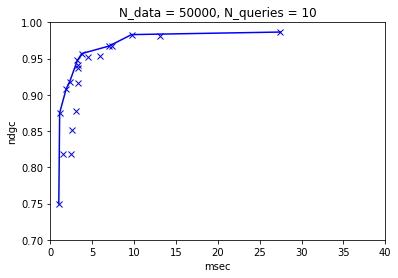

In [12]:
axlims = [0, 40, 0.7, 1]
idxs = plot_search(results, N_data, N_queries, axlims)

# Vary b

In [ ]:
# N_queries = 10

# bs = range(5, 250, 20)
# es = [4, 2] #error tolerance
# Ls = [1, 6] #number of neighbors to make candidates

# results = param_search(data, queries, Ls, bs, es, N_queries)

In [ ]:
# plot_param_search(results, 0, N_data, N_queries)

# Vary eps

In [13]:
N_queries = 200

bs = [200]
es = [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5]
Ls = [1, 6] #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 10
Ls, [1, 6]
bs, [200]
es, [9, 4, 2.7, 2.2, 1.9, 1.7, 1.5]
Ms, [6, 17, 37, 59, 83, 110, 152]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   9.0,     6,     1,    0.363,    0.728
     0,      0,      1,   200,   9.0,     6,     6,    0.523,    0.804
     0,      1,      0,   200,   4.0,    17,     1,    0.743,    0.813
     0,      1,      1,   200,   4.0,    17,     6,    1.232,    0.895
     0,      2,      0,   200,   2.7,    37,     1,    1.190,    0.871
     0,      2,      1,   200,   2.7,    37,     6,    2.416,    0.937
     0,      3,      0,   200,   2.2,    59,     1,    1.910,    0.909
     0,      3,      1,   200,   2.2,    59,     6,    3.872,    0.949
     0,      4,      0,   200,   1.9,    83,     1,    3.176,    0.911
     0,      4,      1,   200,   1.9,    83,     6,    4.716,    0.964
     0,      5,      0,   200,   1.7,   110,     1,    3.712,    0.928
     0,      5,      1,   20

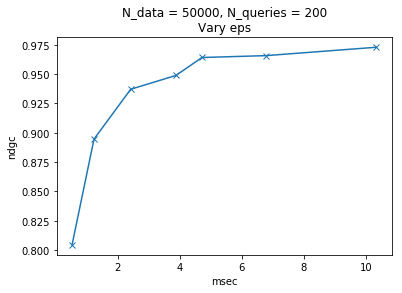

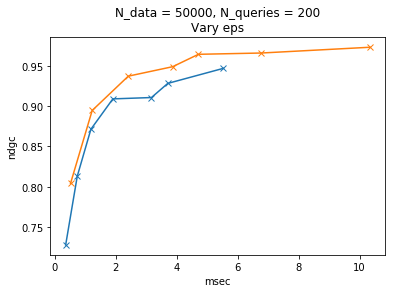

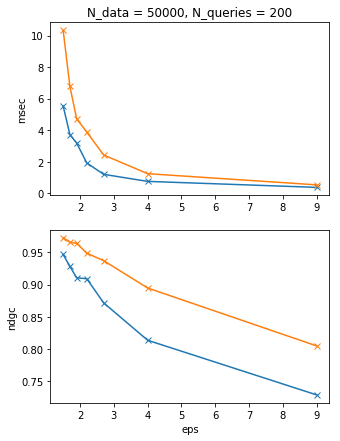

In [14]:
plot_param_search(results, 1, N_data, N_queries)

# Vary L

In [15]:
N_queries = 200

bs = [200]
es = [4, 2] #error tolerance
Ls = range(0, 20, 1) #number of neighbors to make candidates

results = param_search(data, queries, Ls, bs, es, N_queries)

N_data, N_queries, 50000, 10
Ls, range(0, 20)
bs, [200]
es, [4, 2]
Ms, [17, 74]
 b_idx,  e_idx,  L_idx,     b,   eps,     M,     L, t (msec),     ndgc
     0,      0,      0,   200,   4.0,    17,     0,    0.668,    0.692
     0,      0,      1,   200,   4.0,    17,     1,    0.897,    0.794
     0,      0,      2,   200,   4.0,    17,     2,    0.796,    0.822
     0,      0,      3,   200,   4.0,    17,     3,    0.999,    0.847
     0,      0,      4,   200,   4.0,    17,     4,    0.923,    0.863
     0,      0,      5,   200,   4.0,    17,     5,    1.153,    0.870
     0,      0,      6,   200,   4.0,    17,     6,    1.077,    0.876
     0,      0,      7,   200,   4.0,    17,     7,    1.153,    0.879
     0,      0,      8,   200,   4.0,    17,     8,    1.200,    0.886
     0,      0,      9,   200,   4.0,    17,     9,    1.490,    0.888
     0,      0,     10,   200,   4.0,    17,    10,    1.622,    0.889
     0,      0,     11,   200,   4.0,    17,    11,    1.775,    0.8

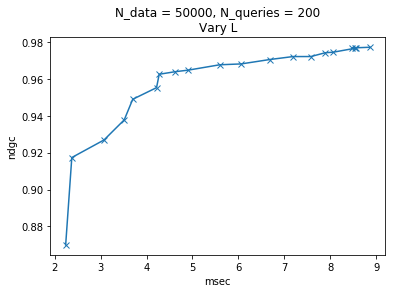

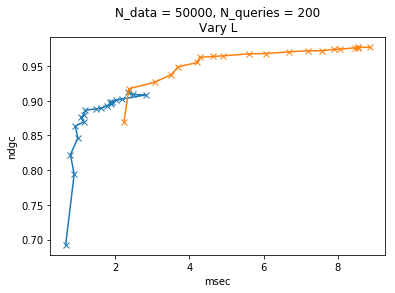

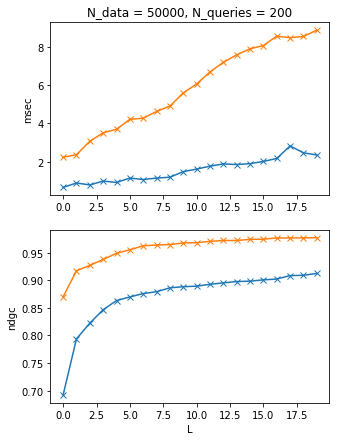

In [16]:
plot_param_search(results, 2, N_data, N_queries)